In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from matplotlib import style
style.use('ggplot')

In [214]:
bitlen = 10000
nb = 100  # Digital signal per bit

# biSeq = [random.randint(0,1) for x in range(0,bitlen)]
biSeq = np.array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])
bitlen = biSeq.size
print('\nthe input binary sequence is : {}\n'.format(biSeq))
A = 1         # Carrier amplitude for binary input  

f1 = 3
f2 = 2

timepd = np.arange(0 ,len(biSeq) ,0.01)




the input binary sequence is : [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1

In [26]:
def FSKmod(biSeq):

    #init arrays modSig to store output FSK and biSig array which stores same data as input signal but sampled at nb samples/bit to plot with timepd
    #lval is just a constant used to iteratively jump nb samples to next bit at every next iteration, thus looping bitlen times for bitlen bits.
    modSig = []
    lval = 0
    biSig = []


    for i in range(0 ,len(biSeq)):
        #this loop iterates bitlen times for each bit
        for j in range(lval, lval + nb):
            #this loop iterates nb times for each bit (once for each sample)
            if biSeq[i] == 1:
                #append sinewave with frequency fskFreq1 for bit 1 --- nb samples 
                modSig.append( A*np.sin(2*np.pi*f1*timepd[j]) )
            else:
                #append sinewave with frequence fskFreq2 for bit 0 --- nb samples
                modSig.append( A*np.sin(2*np.pi*f2*timepd[j]) )
            biSig.append(biSeq[i])
            lval+=1
    return modSig, biSig

In [155]:
def FSKdemod(received_sig):
    sample_duration = len(received_sig)/bitlen
    lval = 0
    bitstream =[]
    tb = np.arange(0, nb)
    i = 0
    c1 = np.sin(2*np.pi*f1*timepd[i*nb : (i+1)*nb])
    c2 = np.sin(2*np.pi*f2*timepd[i*nb : (i+1)*nb])
    # plt.plot(c1)
    for i in range(0 ,len(biSeq)):
        mc1 = np.convolve(c1, received_sig[i*nb : (i+1)*nb], 'same')
        mc2 = np.convolve(c2, received_sig[i*nb : (i+1)*nb], 'same')
        # plt.plot(mc1)
        # plt.show()
        # plt.plot(mc2)
        # plt.show()
        # return
        z1 = np.trapz(mc1, tb)
        z2 = np.trapz(mc2, tb)

        rz1 = abs(round(2*z1))
        rz2 = abs(round(2*z2))
        # print(rz1)
        # print(rz2)
        if (rz2 > 200):
            bitstream.append(1)
        else: 
            bitstream.append(0)
        

    
    return bitstream


In [215]:
modSig, biSig = FSKmod(biSeq)

In [199]:
def awgn(signal):
    regsnr=54
    sigpower = sum([math.pow(abs(signal[i]),2) for i in range(len(signal))])
    sigpower = sigpower/len(signal)
    noisepower = sigpower/(math.pow(10,regsnr/10))
    noise = math.sqrt(noisepower)*(np.random.uniform(-1,1,size=len(signal)))
    return noise

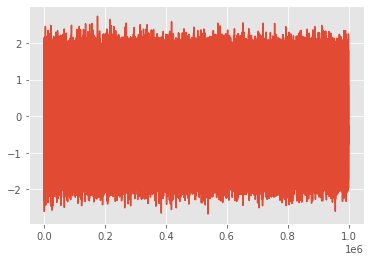

In [216]:
sig_noisy = modSig + .4*np.random.randn(bitlen * nb)
fig = plt.plot(sig_noisy)
plt.show()

In [211]:


print(*FSKdemod(modSig))

print(*biSeq)


0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0
0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0


In [217]:


print(*FSKdemod(sig_noisy))

print(*biSeq)


1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 

In [218]:
# r = FSKdemod(modSig)
r = FSKdemod(sig_noisy)
error = 0
for i in range(0, bitlen):
    if r[i] != biSeq[i]:
        error = error + 1
error = error/bitlen
error

0.1299